<a href="https://colab.research.google.com/github/pumplay01/pumplay01/blob/main/Customer_Single_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('supermarket.csv', delimiter=',')


Check data

In [ ]:
# Display format and data type information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

Delete some column not focus in this case

In [ ]:
# Define the columns to be deleted
columns_to_delete = ['SHOP_WEEK', 'SHOP_WEEKDAY', 'SHOP_HOUR','PROD_CODE_10','PROD_CODE_20','PROD_CODE_30',
                     'PROD_CODE_40','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE','BASKET_SIZE','BASKET_PRICE_SENSITIVITY',
                     'BASKET_TYPE','STORE_CODE','STORE_FORMAT','STORE_REGION']

# Drop the specified columns
df = df.drop(columns=columns_to_delete)

# Verify the resulting DataFrame
print(df)

        SHOP_DATE  QUANTITY  SPEND   PROD_CODE       CUST_CODE  \
0        20071019         1   9.50  PRD0901335  CUST0000804514   
1        20080328         1   1.49  PRD0901120  CUST0000735558   
2        20070612         1   0.86  PRD0900963             NaN   
3        20080604         3   0.90  PRD0901055             NaN   
4        20060824         1   1.77  PRD0901877             NaN   
...           ...       ...    ...         ...             ...   
578077   20071116         1   0.01  PRD0903678  CUST0000451458   
578078   20070612         1  13.76  PRD0902312  CUST0000957158   
578079   20061109         1   4.47  PRD0900396  CUST0000111024   
578080   20070624         1   4.92  PRD0903065  CUST0000412413   
578081   20071229         1   9.27  PRD0901923  CUST0000509062   

              BASKET_ID BASKET_DOMINANT_MISSION  
0       994108000679877                   Fresh  
1       994110300629787                   Fresh  
2       994106200026009                 Grocery  
3      

Delete null customer_code becuase someone are not member and null column

In [ ]:
# Drop rows where 'CUST_CODE' is null
df = df.dropna(subset=['CUST_CODE'])

# Verify the resulting DataFrame
print(df)

        SHOP_DATE  QUANTITY  SPEND   PROD_CODE       CUST_CODE  \
0        20071019         1   9.50  PRD0901335  CUST0000804514   
1        20080328         1   1.49  PRD0901120  CUST0000735558   
1115     20080605         1   0.70  PRD0904509  CUST0000138092   
1116     20061213         1   2.04  PRD0904730  CUST0000099658   
1117     20070713         1   2.19  PRD0900777  CUST0000673735   
...           ...       ...    ...         ...             ...   
578077   20071116         1   0.01  PRD0903678  CUST0000451458   
578078   20070612         1  13.76  PRD0902312  CUST0000957158   
578079   20061109         1   4.47  PRD0900396  CUST0000111024   
578080   20070624         1   4.92  PRD0903065  CUST0000412413   
578081   20071229         1   9.27  PRD0901923  CUST0000509062   

              BASKET_ID BASKET_DOMINANT_MISSION  
0       994108000679877                   Fresh  
1       994110300629787                   Fresh  
1115    994111300258138                 Grocery  
1116   

Check null again all column

In [ ]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the null counts for each column
print(null_counts)

SHOP_DATE                  0
QUANTITY                   0
SPEND                      0
PROD_CODE                  0
CUST_CODE                  0
BASKET_ID                  0
BASKET_DOMINANT_MISSION    0
dtype: int64


Check number of member by count distinct

In [ ]:
#Number customer count distinct
unique_customers = df['CUST_CODE'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 3439


Prepare data for calculate customer analytics as total spending, No.of purchase.

In [ ]:
#total spending each customer
total_spending = df.groupby('CUST_CODE')['SPEND'].sum()
print("Total spending by customer:")
print(total_spending)

Total spending by customer:
CUST_CODE
CUST0000000181       2.44
CUST0000000689     328.57
CUST0000000998       5.95
CUST0000001163      39.74
CUST0000001194    2493.83
                   ...   
CUST0000999439      43.60
CUST0000999544       6.32
CUST0000999593     453.58
CUST0000999935     444.17
CUST0000999936      17.67
Name: SPEND, Length: 3439, dtype: float64


In [ ]:
#Average spending per customer:
average_spending = df.groupby('CUST_CODE')['SPEND'].mean()
print("Average spending per customer:")
print(average_spending)

Average spending per customer:
CUST_CODE
CUST0000000181    2.440000
CUST0000000689    1.776054
CUST0000000998    1.487500
CUST0000001163    1.589600
CUST0000001194    2.081661
                    ...   
CUST0000999439    2.906667
CUST0000999544    6.320000
CUST0000999593    1.527205
CUST0000999935    1.882076
CUST0000999936    1.178000
Name: SPEND, Length: 3439, dtype: float64


In [ ]:
#Number of purchases per customer
purchase_count = df.groupby('CUST_CODE')['BASKET_ID'].nunique()
print("Number of purchases per customer:")
print(purchase_count)

Number of purchases per customer:
CUST_CODE
CUST0000000181      1
CUST0000000689     16
CUST0000000998      3
CUST0000001163      4
CUST0000001194    103
                 ... 
CUST0000999439     10
CUST0000999544      1
CUST0000999593     30
CUST0000999935     21
CUST0000999936      6
Name: BASKET_ID, Length: 3439, dtype: int64


In [ ]:
#Frequency of customer visits:
visit_frequency = df.groupby('CUST_CODE')['BASKET_ID'].count()
print("Visit frequency per customer:")
print(visit_frequency)

Visit frequency per customer:
CUST_CODE
CUST0000000181       1
CUST0000000689     185
CUST0000000998       4
CUST0000001163      25
CUST0000001194    1198
                  ... 
CUST0000999439      15
CUST0000999544       1
CUST0000999593     297
CUST0000999935     236
CUST0000999936      15
Name: BASKET_ID, Length: 3439, dtype: int64


Create data for calculate next step from aggregate previouse code and then join to main dataset

In [ ]:
# Create DataFrames for the customer analytics results
df_total_spending = pd.DataFrame({'CUST_CODE': total_spending.index, 'total_spending': total_spending.values})
df_average_spending = pd.DataFrame({'CUST_CODE': average_spending.index, 'average_spending': average_spending.values})
df_purchase_count = pd.DataFrame({'CUST_CODE': purchase_count.index, 'purchase_count': purchase_count.values})
df_visit_frequency = pd.DataFrame({'CUST_CODE': visit_frequency.index, 'visit_frequency': visit_frequency.values})


In [ ]:
# Merge the customer analytics DataFrames with the main dataset
df_total = pd.merge(df, df_total_spending, on='CUST_CODE', how='left')
df_total = pd.merge(df_total, df_average_spending, on='CUST_CODE', how='left')
df_total = pd.merge(df_total, df_purchase_count, on='CUST_CODE', how='left')
df_total = pd.merge(df_total, df_visit_frequency, on='CUST_CODE', how='left')

In [ ]:
# Display the merged dataset
print(df_total)

        SHOP_DATE  QUANTITY  SPEND   PROD_CODE       CUST_CODE  \
0        20071019         1   9.50  PRD0901335  CUST0000804514   
1        20080328         1   1.49  PRD0901120  CUST0000735558   
2        20080605         1   0.70  PRD0904509  CUST0000138092   
3        20061213         1   2.04  PRD0904730  CUST0000099658   
4        20070713         1   2.19  PRD0900777  CUST0000673735   
...           ...       ...    ...         ...             ...   
492489   20071116         1   0.01  PRD0903678  CUST0000451458   
492490   20070612         1  13.76  PRD0902312  CUST0000957158   
492491   20061109         1   4.47  PRD0900396  CUST0000111024   
492492   20070624         1   4.92  PRD0903065  CUST0000412413   
492493   20071229         1   9.27  PRD0901923  CUST0000509062   

              BASKET_ID BASKET_DOMINANT_MISSION  total_spending  \
0       994108000679877                   Fresh           20.23   
1       994110300629787                   Fresh           12.30   
2     

Delete some column

In [ ]:
# Define the columns to be deleted
columns_to_delete2 = ['BASKET_ID']

# Drop the specified columns
df_new = df_total.drop(columns=columns_to_delete2)

# Verify the resulting DataFrame
print(df_new)

        SHOP_DATE  QUANTITY  SPEND   PROD_CODE       CUST_CODE  \
0        20071019         1   9.50  PRD0901335  CUST0000804514   
1        20080328         1   1.49  PRD0901120  CUST0000735558   
2        20080605         1   0.70  PRD0904509  CUST0000138092   
3        20061213         1   2.04  PRD0904730  CUST0000099658   
4        20070713         1   2.19  PRD0900777  CUST0000673735   
...           ...       ...    ...         ...             ...   
492489   20071116         1   0.01  PRD0903678  CUST0000451458   
492490   20070612         1  13.76  PRD0902312  CUST0000957158   
492491   20061109         1   4.47  PRD0900396  CUST0000111024   
492492   20070624         1   4.92  PRD0903065  CUST0000412413   
492493   20071229         1   9.27  PRD0901923  CUST0000509062   

       BASKET_DOMINANT_MISSION  total_spending  average_spending  \
0                        Fresh           20.23          3.371667   
1                        Fresh           12.30          3.075000   
2  

Change for my perception only!!!!

In [ ]:
#Change name
df_forml = df_new
print(df_forml)

        SHOP_DATE  QUANTITY  SPEND   PROD_CODE       CUST_CODE  \
0        20071019         1   9.50  PRD0901335  CUST0000804514   
1        20080328         1   1.49  PRD0901120  CUST0000735558   
2        20080605         1   0.70  PRD0904509  CUST0000138092   
3        20061213         1   2.04  PRD0904730  CUST0000099658   
4        20070713         1   2.19  PRD0900777  CUST0000673735   
...           ...       ...    ...         ...             ...   
492489   20071116         1   0.01  PRD0903678  CUST0000451458   
492490   20070612         1  13.76  PRD0902312  CUST0000957158   
492491   20061109         1   4.47  PRD0900396  CUST0000111024   
492492   20070624         1   4.92  PRD0903065  CUST0000412413   
492493   20071229         1   9.27  PRD0901923  CUST0000509062   

       BASKET_DOMINANT_MISSION  total_spending  average_spending  \
0                        Fresh           20.23          3.371667   
1                        Fresh           12.30          3.075000   
2  

CLUSTERING --ELBOW

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

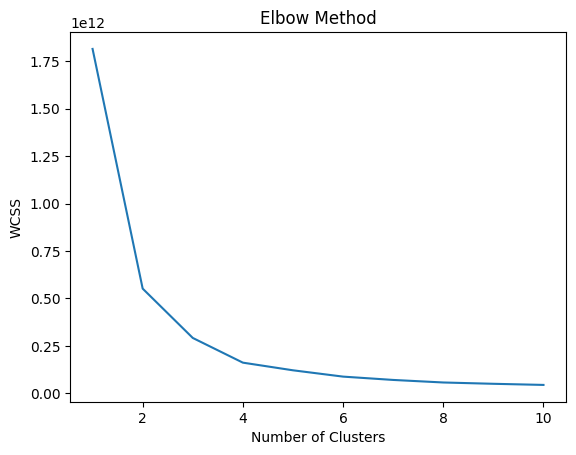

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns for clustering
cluster_cols = ['total_spending', 'average_spending', 'purchase_count', 'visit_frequency']

# Create a subset of the dataset with the selected columns
df_cluster = df_forml[cluster_cols]

# Perform K-means clustering with different numbers of clusters
wcss = []
max_clusters = 10  # Maximum number of clusters to try

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) against the number of clusters
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


CLUSTERING
--K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


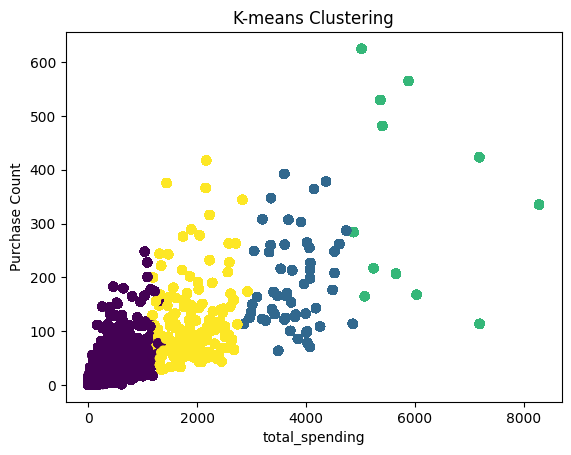

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns for clustering
cluster_cols = ['total_spending', 'average_spending', 'purchase_count', 'visit_frequency']

# Create a subset of the dataset with the selected columns
df_cluster = df_forml[cluster_cols]

# Perform K-means clustering with the optimal number of clusters
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_cluster)

# Add the cluster labels to the dataset
df_forml['cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(df_forml['total_spending'], df_forml['purchase_count'], c=df_forml['cluster'], cmap='viridis')
plt.xlabel('total_spending')
plt.ylabel('Purchase Count')
plt.title('K-means Clustering')
plt.show()

In [ ]:
print(df_forml)

        SHOP_DATE  QUANTITY  SPEND   PROD_CODE       CUST_CODE  \
0        20071019         1   9.50  PRD0901335  CUST0000804514   
1        20080328         1   1.49  PRD0901120  CUST0000735558   
2        20080605         1   0.70  PRD0904509  CUST0000138092   
3        20061213         1   2.04  PRD0904730  CUST0000099658   
4        20070713         1   2.19  PRD0900777  CUST0000673735   
...           ...       ...    ...         ...             ...   
492489   20071116         1   0.01  PRD0903678  CUST0000451458   
492490   20070612         1  13.76  PRD0902312  CUST0000957158   
492491   20061109         1   4.47  PRD0900396  CUST0000111024   
492492   20070624         1   4.92  PRD0903065  CUST0000412413   
492493   20071229         1   9.27  PRD0901923  CUST0000509062   

       BASKET_DOMINANT_MISSION  total_spending  average_spending  \
0                        Fresh           20.23          3.371667   
1                        Fresh           12.30          3.075000   
2  

Find behavior each cluster like mean,min,max

In [ ]:
# Define the columns for which you want to calculate the statistics
columns_of_interest = ['total_spending', 'purchase_count','visit_frequency']

# Calculate the mean, minimum, and maximum values for the specified columns in each cluster
cluster_stats = df_forml.groupby('cluster')[columns_of_interest].agg(['mean', 'min', 'max'])
cluster_stats_mean = df_forml.groupby('cluster')[columns_of_interest].agg(['mean'])

# Display the cluster statistics
cluster_stats = cluster_stats.round(0)
cluster_stats_mean = cluster_stats_mean.round(0)
print(cluster_stats)

# Calculate the mean values for each variable within each cluster
cluster_profiles = df_forml.groupby('cluster').mean()

print('_______________________________________________________________________')

# Filter the cluster profiles to include only integer columns
cluster_profiles = cluster_profiles.round(1)

# Display the integer cluster profiles
print(cluster_profiles)


        total_spending                 purchase_count            \
                  mean     min     max           mean  min  max   
cluster                                                           
0                496.0     0.0  1333.0           39.0    1  248   
1               3801.0  2863.0  4858.0          196.0   64  392   
2               5938.0  4874.0  8282.0          354.0  114  624   
3               1982.0  1181.0  2926.0          123.0   29  417   

        visit_frequency              
                   mean   min   max  
cluster                              
0                 263.0     1   731  
1                1990.0   955  2849  
2                2943.0  2254  3453  
3                1096.0   371  1914  
_______________________________________________________________________
          SHOP_DATE  QUANTITY  SPEND  total_spending  average_spending  \
cluster                                                                  
0        20069765.4       1.5    1.9        

<ipython-input-51-eb144fda2f26>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df_forml.groupby('cluster').mean()


Show box plot for easy reading

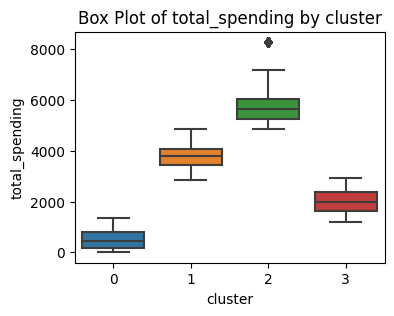

        total_spending purchase_count visit_frequency
                  mean           mean            mean
cluster                                              
0                496.0           39.0           263.0
1               3801.0          196.0          1990.0
2               5938.0          354.0          2943.0
3               1982.0          123.0          1096.0


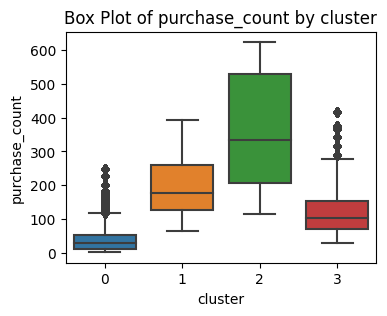

        total_spending purchase_count visit_frequency
                  mean           mean            mean
cluster                                              
0                496.0           39.0           263.0
1               3801.0          196.0          1990.0
2               5938.0          354.0          2943.0
3               1982.0          123.0          1096.0


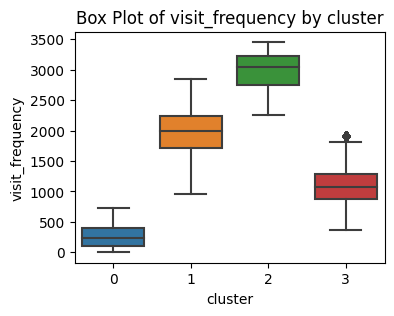

        total_spending purchase_count visit_frequency
                  mean           mean            mean
cluster                                              
0                496.0           39.0           263.0
1               3801.0          196.0          1990.0
2               5938.0          354.0          2943.0
3               1982.0          123.0          1096.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each column in each cluster
for column in columns_of_interest:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='cluster', y=column, data=df_forml)
    plt.title(f'Box Plot of {column} by cluster')
    plt.xlabel('cluster')
    plt.ylabel(column)
    plt.show()
    print(cluster_stats_mean)

In [ ]:
print(df_forml)

        SHOP_DATE  QUANTITY  SPEND   PROD_CODE       CUST_CODE  \
0        20071019         1   9.50  PRD0901335  CUST0000804514   
1        20080328         1   1.49  PRD0901120  CUST0000735558   
2        20080605         1   0.70  PRD0904509  CUST0000138092   
3        20061213         1   2.04  PRD0904730  CUST0000099658   
4        20070713         1   2.19  PRD0900777  CUST0000673735   
...           ...       ...    ...         ...             ...   
492489   20071116         1   0.01  PRD0903678  CUST0000451458   
492490   20070612         1  13.76  PRD0902312  CUST0000957158   
492491   20061109         1   4.47  PRD0900396  CUST0000111024   
492492   20070624         1   4.92  PRD0903065  CUST0000412413   
492493   20071229         1   9.27  PRD0901923  CUST0000509062   

       BASKET_DOMINANT_MISSION  total_spending  average_spending  \
0                        Fresh           20.23          3.371667   
1                        Fresh           12.30          3.075000   
2  

In [ ]:
# Group the DataFrame by the 'Cluster' column and calculate the most frequent 'PROD_CODE'
most_common_BASKET_DOMINANT_MISSION = df_forml.groupby('cluster')['BASKET_DOMINANT_MISSION'].apply(lambda x: x.value_counts().idxmax())

# Display the most frequent PROD_CODE for each cluster
print(most_common_BASKET_DOMINANT_MISSION)

cluster
0    Fresh
1    Fresh
2    Fresh
3    Fresh
Name: BASKET_DOMINANT_MISSION, dtype: object
